In [1]:
from bold_dementia.cogpred import MatrixMasker, make_training_data
from bold_dementia.utils.configuration import get_config
from neuroginius.atlas import Atlas
config = get_config()
conn_dir = config["connectivity_matrices"]
k = 3
ATLAS = "schaefer200"
atlas = Atlas.from_name(ATLAS, soft=False)
SUFFIX = "prediction" # suffix given to the matrix dir

matrices, metadata = make_training_data(conn_dir, ATLAS, k, test_centre=None, suffix=SUFFIX)

Dropping 12 subjects because of lacking MMMSE


In [2]:
metadata

,file_path,file_basename,file_tag,file_type,file_fields,sub,ses,task,space,res,...,DEMENCE_DAT,APOE_eps4,APOE_geno,APOE_y,M000,M024,M048,current_scan_age,scan_to_onset,cluster_label
0,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0001_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",1,M000,rest,MNI152NLin6Asym,2,...,NaN,0.0,eps3/eps3,Non,2013-12-06,2015-10-14,2017-10-16,79.745205,NaN,0.0
1,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0003_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",3,M000,rest,MNI152NLin6Asym,2,...,NaN,0.0,eps3/eps3,Non,2013-07-09,2015-06-02,NaN,74.591781,NaN,0.0
2,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0004_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",4,M000,rest,MNI152NLin6Asym,2,...,NaN,1.0,eps3/eps4,Oui,2014-02-04,2016-01-19,NaN,70.427397,NaN,1.0
3,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0005_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",5,M000,rest,MNI152NLin6Asym,2,...,NaN,0.0,eps3/eps3,Non,2013-12-12,2015-11-04,2017-10-11,77.758904,NaN,0.0
4,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-0007_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",7,M000,rest,MNI152NLin6Asym,2,...,NaN,0.0,eps3/eps3,Non,2012-09-27,2014-05-23,2016-06-10,77.768493,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-2443_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",2443,M000,rest,MNI152NLin6Asym,2,...,NaN,1.0,eps3/eps4,Oui,2014-01-21,2016-01-12,2017-12-12,57.445205,NaN,0.0
1230,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-2446_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",2446,M000,rest,MNI152NLin6Asym,2,...,NaN,0.0,eps3/eps3,Non,2012-03-14,NaN,NaN,55.041096,NaN,0.0
1231,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-2447_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",2447,M000,rest,MNI152NLin6Asym,2,...,2017-11-21,1.0,eps3/eps4,Oui,2012-09-13,2014-10-29,2017-01-17,72.708219,1895.0,1.0
1232,/georges/memento/BIDS/derivatives/fmriprep-23....,sub-2448_ses-M000_task-rest_space-MNI152NLin6A...,bold,nii.gz,"['sub', 'ses', 'task', 'space', 'res', 'desc']",2448,M000,rest,MNI152NLin6Asym,2,...,NaN,0.0,eps3/eps3,Non,2014-03-04,NaN,NaN,76.090411,NaN,0.0


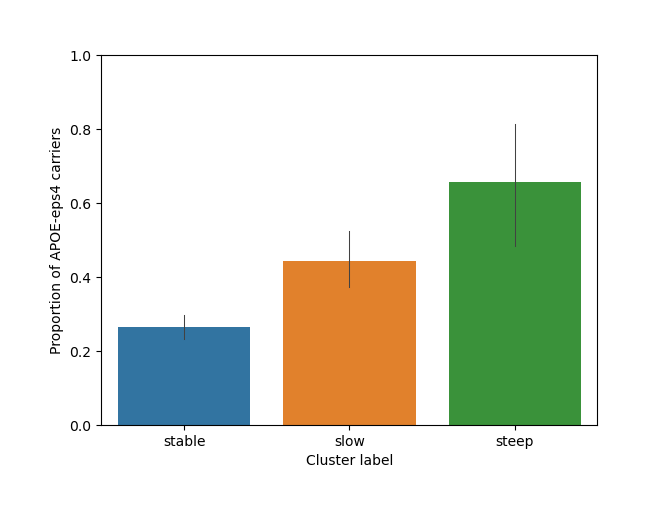

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(metadata, x="cluster_label", y="APOE_eps4", hue="cluster_label", palette="tab10", legend=None)
plt.xticks(range(3), labels=("stable", "slow", "steep"))
plt.ylabel("Proportion of APOE-eps4 carriers")
plt.xlabel("Cluster label")
plt.ylim(0, 1)
plt.show()